#  Rastrigin function optimization (max).

The general equation is given by:

$f(\mathbf{x}) = An + \sum_{i=1}^{n} [x_i^2 - A\cos(2 \pi x_i)]$, with  $-5.12 \le x_i \le +5.12$,
and $A = 10$. According to [Rastrigin function](https://en.wikipedia.org/wiki/Rastrigin_function) for a given number of dimensions $n$ the maximum can be found accordingly. To test here the code we set $n=5$, which gives the maximum of $201.7664509$ at coordinates $x_i \in [\pm 4.52299366, ..., \pm 4.52299366]$.

### First we import python libraries and set up the directory of our code.

In [3]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('../code')
sys.path.append(PROJECT_DIR)

### Here we import all our custom GA code.

In [5]:
# Import main classes.
from pygenalgo.genome.gene import Gene
from pygenalgo.genome.chromosome import Chromosome
from pygenalgo.engines.standard_ga import StandardGA

# Import Selection Operator(s).
from pygenalgo.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operator(s).
from pygenalgo.operators.crossover.uniform_crossover import UniformCrossover

# Import Mutation Operator(s).
from pygenalgo.operators.mutation.random_mutator import RandomMutator

### Define the Rastrigin function, which plays also the role of the 'fitness' function.

In addition, we define the '_func' which takes the role of the 'random()' method of the Genes. Every time we
want to 'mutate' a gene this function will be called that returns 'valid', but random values for the gene.

In [7]:
# Rastrigin function.
def fun_Rastrigin(individual: Chromosome, f_min: bool = False):
    
    # Setup the model parameters.
    A, n = 10.0, len(individual)
    
    # Function value.
    f_val = A*n + fsum([xi.datum**2 - A*np.cos(2.0*np.pi*xi.datum) for xi in individual])
    
    # Return the f_val.
    return -f_val if f_min else f_val
# _end_def_

# Random function ~U(-5.12, +5.12).
_func = lambda: np.random.uniform(-5.12, +5.12001)

Here we set the GA parameters, such as number of genes, number of chromosomes, etc. Note that in this case each
gene has the same random() function (set by '_func'). But if the problem demands otherwise it is easy to set a 
different random() function for each gene.

In [9]:
# Define the number of genes.
M = 5

# Define the number of chromosomes.
N = 100

# Initial population.
# It is important to note that the initial population is randomly generated with valid values.
population = [Chromosome([Gene(np.random.uniform(-5.0, +5.0), _func) for j in range(M)], np.nan, True)
              for i in range(N)]

# Create the StandardGA object that will carry on the optimization.
# Note: in this example we have accepted, silently, the default probabilities in the
# genetic operators. These can be altered here before passed to the StandardGA constructor.
toy_GA = StandardGA(initial_pop=population, fit_func=fun_Rastrigin, select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(), cross_op=UniformCrossover())

### Optimization process.

Here we call the GA object (either directly, or through the method run()). We set a number of parameter,
such as the maximum iterations (i.e. epochs), tolerance for the fitness convergences, etc.

In [11]:
toy_GA(epochs=2000, elitism=True, f_tol=1.0e-6, verbose=False)

Initial Avg. Fitness = 91.9044
Final   Avg. Fitness = 199.3661
Elapsed time: 31.936 seconds.


In [12]:
# Display the (final) optimum value.
print(f"Maximum Found: {fun_Rastrigin(toy_GA.best_chromosome(), f_min=False):.5f}\n")

# Display each gene value separately.
for i, xi in enumerate(toy_GA.best_chromosome()._genome):
    print(f"x{i} = {xi.datum:.5f}")
# _end_for_

# True maximum: 201.7664509.

Maximum Found: 201.76591

x0 = -4.52153
x1 = -4.52286
x2 = 4.52292
x3 = 4.52263
x4 = 4.52370


**Note that the above solution is indeed very close to the absolute maximum!**

In [14]:
# If we want we can also print some operator statistics.
toy_GA.print_operator_stats()

 LinearRankSelector: (140677731209792)
 _probability: 1.0
 _counter: 2000

 UniformCrossover: (140677728351872)
 _probability: 0.9
 _counter: 90013

 RandomMutator: (140677725105664)
 _probability: 0.1
 _counter: 19979



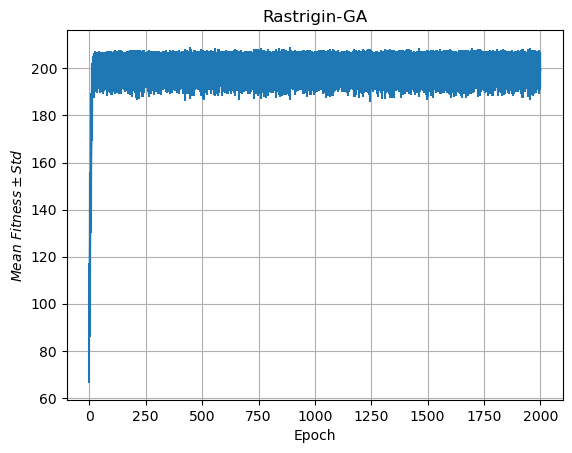

In [15]:
# Plot the average (population) fitness along with its spread (std)
# as function of the epochs.
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'])

plt.grid(True)
plt.title("Rastrigin-GA")
plt.xlabel("Epoch")
plt.ylabel("$Mean~Fitness \pm Std$");

### End of file